# ANALYSIS OF BANK MARKET DATA SET

## 1. Importing useful libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

## 2. Reading the data provided.

In [3]:
df = pd.read_excel('bank_market.xlsx')
df

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 3. Understanding the data.

In [4]:
df.shape

(45211, 18)

In [5]:
df.columns.values

array(['Cust_num', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cust_num   45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [7]:
df[['age', 'balance', 'pdays', 'previous', 'campaign']].describe()

,age,balance,pdays,previous,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,40.197828,0.580323,2.763841
std,10.618762,3044.765829,100.128746,2.303441,3.098021
min,18.000000,-8019.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,-1.000000,0.000000,2.000000
75%,48.000000,1428.000000,-1.000000,0.000000,3.000000
max,95.000000,102127.000000,871.000000,275.000000,63.000000


In [8]:
df.describe(include = ['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## 4. Checking for null values in the data.

In [9]:
df[df.isnull().any(axis=1)]

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [10]:
df.isnull().sum()

Cust_num     0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 5. Checking for duplications in the data. 

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace = True)
df

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 6. Checking outliers for the features in the data.

<AxesSubplot:>

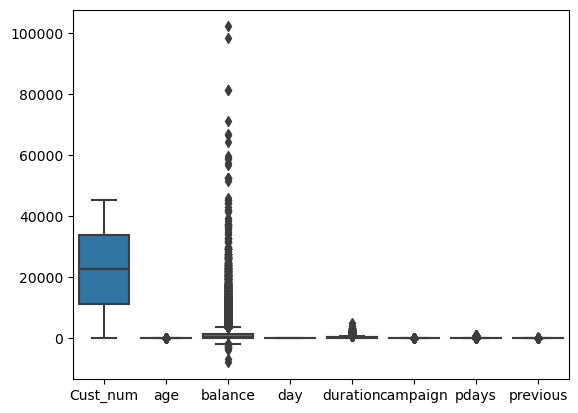

In [13]:
sns.boxplot(data=df)

## 7. Checking for wrong data.

In [14]:
#Since the pdays have -1 as value, which is incorrect as pdays holds - 
#NUMBER OF DAYS THAT PASSED BY AFTER THE CLIENT WAS LAST CONTACTED FROM A PREVIOUS CAMPAIGN.
#so, Days can't be in negative and therefore we made a correction in the data for the same.

df.loc[df['pdays'] == -1, 'pdays'] = 0
df

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,0,unknown,no


## 8. Analysis of features in the provided data.

### ➜ AGE

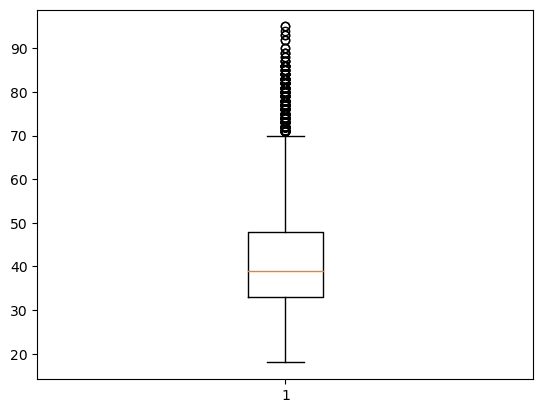

In [15]:
plt.boxplot(df['age'])
plt.show()

In [16]:
x = df['age']>70
x.sum()

487

In [17]:
st.mode(df['age'])

32

### ➜ JOB

In [211]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

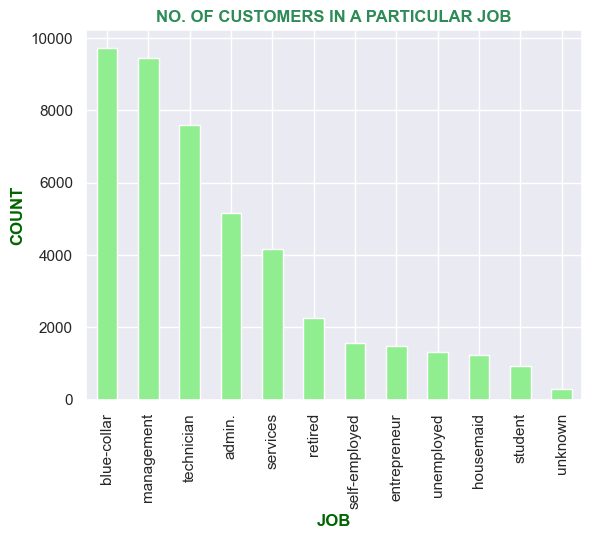

In [532]:
df['job'].value_counts().plot(kind = 'bar', color = 'lightgreen')

plt.xlabel('JOB', color = 'darkgreen', weight = 'heavy')

plt.ylabel('COUNT', color = 'darkgreen', weight = 'heavy')

plt.title("NO. OF CUSTOMERS IN A PARTICULAR JOB", color = 'seagreen', weight = 'bold')

plt.show()

### ➜ MARITAL

In [533]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

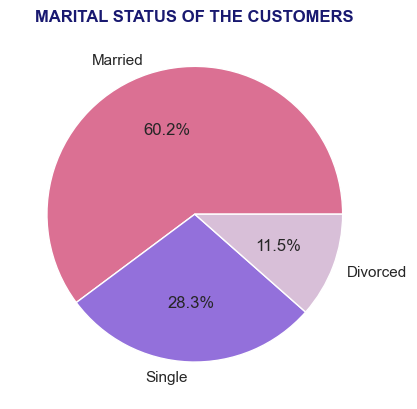

In [534]:
plt.pie(df['marital'].value_counts(), colors = ['palevioletred','mediumpurple','thistle'], 
        labels = ['Married', 'Single', 'Divorced'], autopct = '%1.1f%%')

plt.title('MARITAL STATUS OF THE CUSTOMERS', color = 'midnightblue', weight = 'bold')

plt.show()

### ➜ EDUCATION

In [535]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

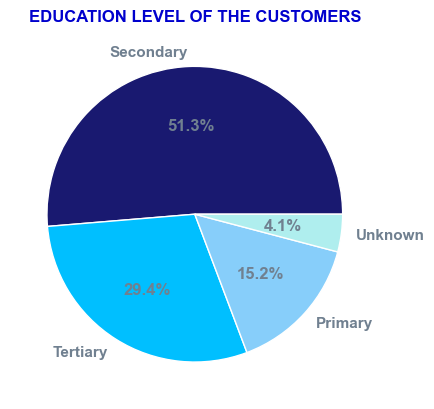

In [536]:
plt.pie(df['education'].value_counts(), colors = ['midnightblue','deepskyblue','lightskyblue', 'paleturquoise'], 
        labels = ['Secondary', 'Tertiary', 'Primary', 'Unknown'], autopct = '%1.1f%%', 
        textprops={'color':"slategrey", 'weight':'bold'})

plt.title('EDUCATION LEVEL OF THE CUSTOMERS', color = 'mediumblue', weight = 'bold')

plt.show()

### ➜ DEFAULT

In [537]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

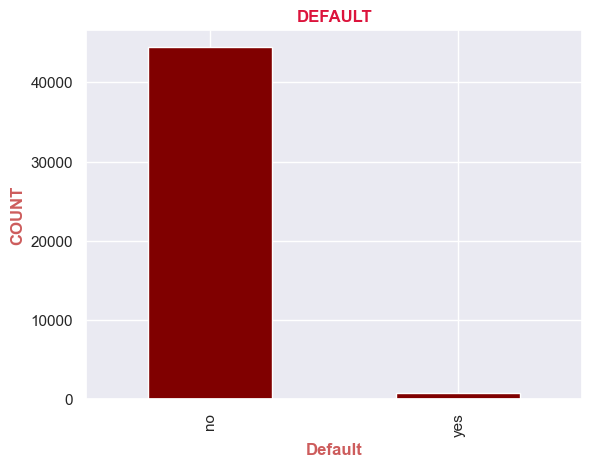

In [538]:
df['default'].value_counts().plot(kind = 'bar', color = 'maroon')

plt.xlabel('Default', weight = 'heavy', color = 'indianred')

plt.ylabel('COUNT', weight = 'heavy', color = 'indianred')

plt.title('DEFAULT', weight = 'bold', color = 'crimson')

plt.show()

### ➜ BALANCE

In [52]:
df['balance'].value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

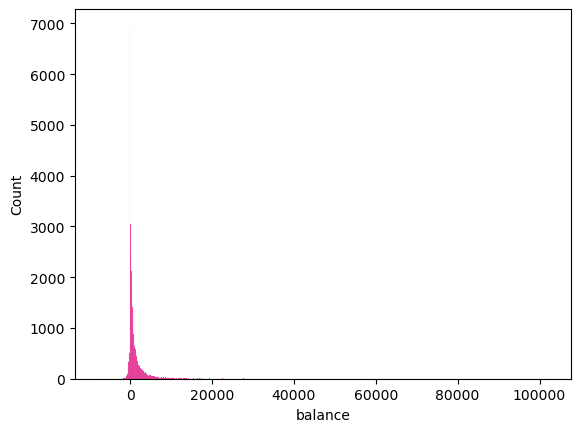

In [49]:
sns.histplot(df['balance'], color = "deeppink")

plt.show()

### ➜ HOUSING

In [207]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

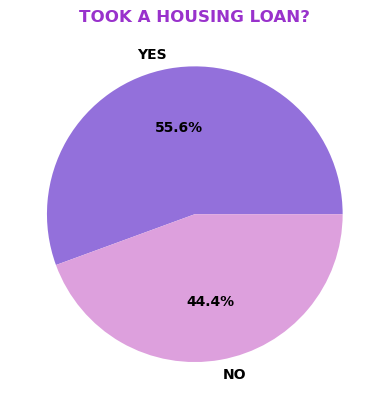

In [208]:
plt.pie(df['housing'].value_counts(), colors = ['mediumpurple', 'plum'], labels = ['YES', 'NO'], 
        autopct = '%1.1f%%', textprops = {'weight' : 'bold'})

plt.title('TOOK A HOUSING LOAN?', color = 'darkorchid', weight = 'bold')
plt.show()

### ➜ LOAN

In [209]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

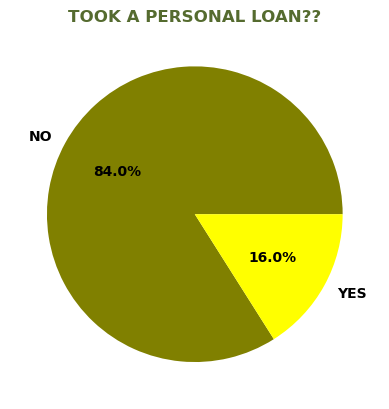

In [210]:
plt.pie(df['loan'].value_counts(), colors = ['olive', 'yellow'], labels = ['NO', 'YES'], 
           autopct = '%1.1f%%', textprops = { 'weight':'heavy'})

plt.title('TOOK A PERSONAL LOAN??', color = 'darkolivegreen', weight = 'bold')

plt.show()

### ➜ CONTACT

In [544]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

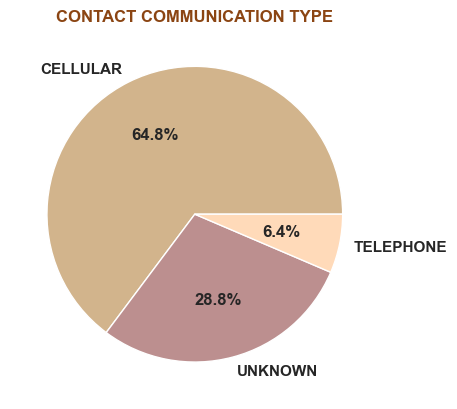

In [545]:
plt.pie(df['contact'].value_counts(), colors = ['tan', 'rosybrown', 'peachpuff'], labels = ['CELLULAR', 'UNKNOWN', 'TELEPHONE'],
       autopct = '%1.1f%%', textprops = {'weight':'heavy'})

plt.title('CONTACT COMMUNICATION TYPE', color = 'saddlebrown', weight = 'bold')

plt.show()

### ➜ DAY

In [546]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

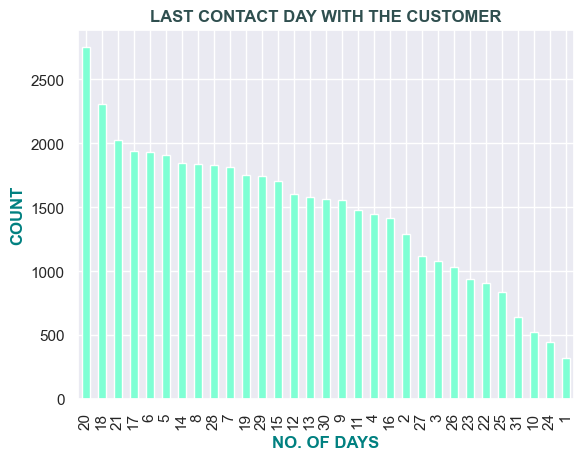

In [547]:
df['day'].value_counts().plot(kind = 'bar', color = 'aquamarine')

plt.xlabel('NO. OF DAYS', color = 'teal', weight = 'heavy')

plt.ylabel('COUNT', color = 'teal', weight = 'heavy')

plt.title('LAST CONTACT DAY WITH THE CUSTOMER', color = 'darkslategrey', weight = 'bold')

plt.show()

### ➜ MONTH

In [548]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

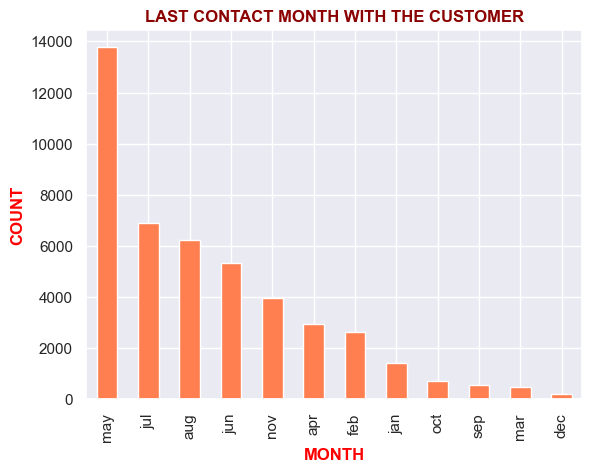

In [549]:
df['month'].value_counts().plot(kind = 'bar', color = 'coral')

plt.xlabel('MONTH', color = 'red', weight = 'heavy')

plt.ylabel('COUNT', color = 'red', weight = 'heavy')

plt.title('LAST CONTACT MONTH WITH THE CUSTOMER', color = 'darkred', weight = 'bold')

plt.show()

### ➜ DURATION

In [550]:
df['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

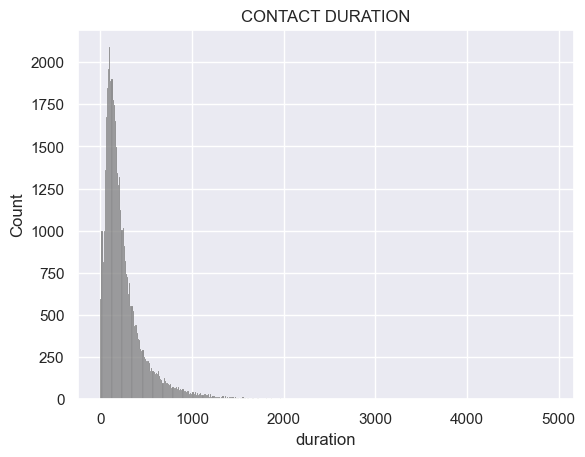

In [551]:
sns.histplot(df["duration"], color = 'dimgray').set(title = 'CONTACT DURATION')

plt.show()

### ➜ CAMPAIGN

In [552]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

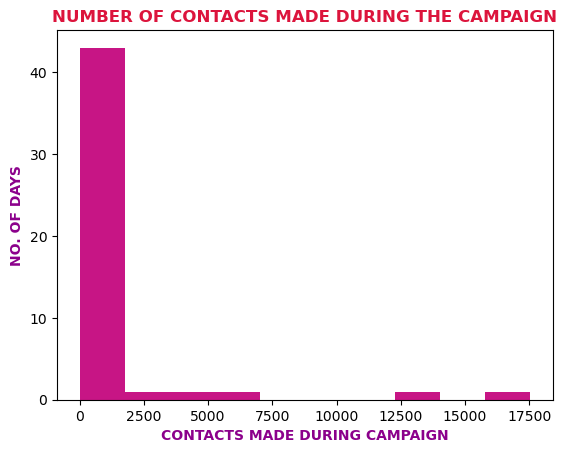

In [19]:
plt.hist(df['campaign'].value_counts(), color = 'mediumvioletred')

plt.xlabel('CONTACTS MADE DURING CAMPAIGN', color = 'darkmagenta', weight = 'heavy')

plt.ylabel('NO. OF DAYS', color = 'darkmagenta', weight = 'heavy')

plt.title('NUMBER OF CONTACTS MADE DURING THE CAMPAIGN', color = 'crimson', weight = 'bold')

plt.show()

### ➜ PDAYS

In [554]:
df['pdays'].value_counts()

0      36954
182      167
92       147
91       126
183      126
       ...  
449        1
452        1
648        1
595        1
530        1
Name: pdays, Length: 559, dtype: int64

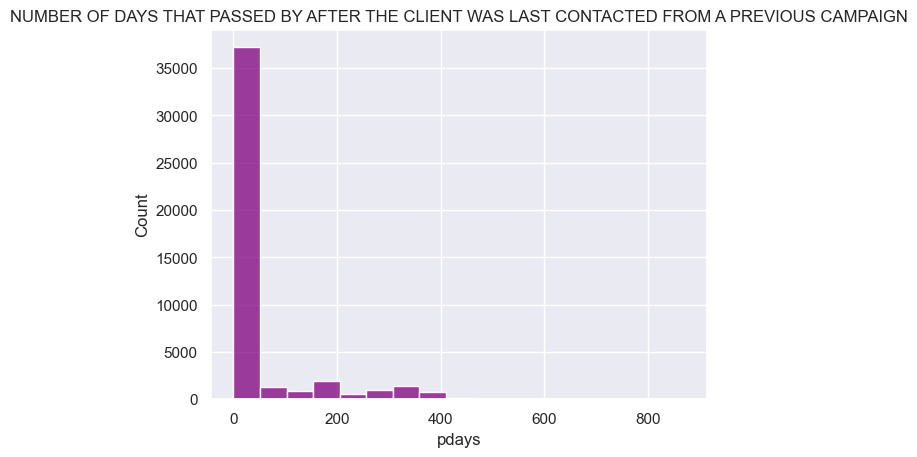

In [555]:
sns.histplot(df['pdays'], color = 'PURPLE').set(title = 'NUMBER OF DAYS THAT PASSED BY AFTER THE CLIENT WAS LAST CONTACTED FROM A PREVIOUS CAMPAIGN')

plt.show()

### ➜ PREVIOUS

In [564]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

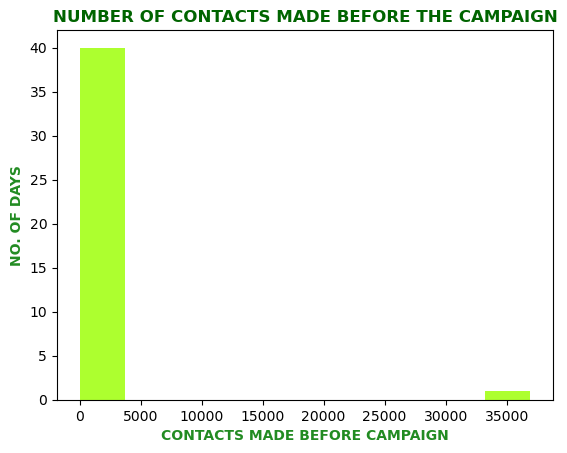

In [24]:
plt.hist(df['previous'].value_counts(), color = 'greenyellow')

plt.xlabel('CONTACTS MADE BEFORE CAMPAIGN', color = 'forestgreen', weight = 'heavy')

plt.ylabel('NO. OF DAYS', color = 'forestgreen', weight = 'heavy')

plt.title('NUMBER OF CONTACTS MADE BEFORE THE CAMPAIGN', color = 'darkgreen', weight = 'bold')

plt.show()

### ➜ POUTCOME

In [26]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

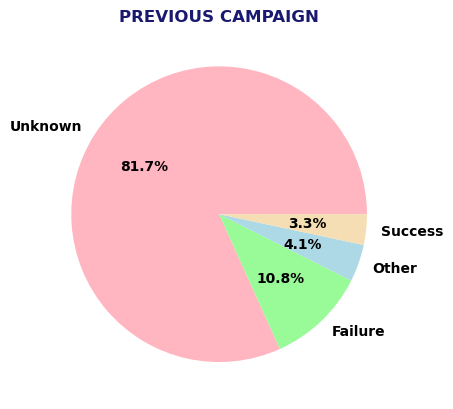

In [32]:
plt.pie(df['poutcome'].value_counts(), colors = ['lightpink', 'palegreen', 'lightblue', 'wheat'], 
        labels = ['Unknown', 'Failure', 'Other', 'Success'], autopct = '%1.1f%%', textprops = {'weight':'heavy'})

plt.title('PREVIOUS CAMPAIGN', color = 'midnightblue', weight = 'bold')

plt.show()

### ➜ Y

In [558]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

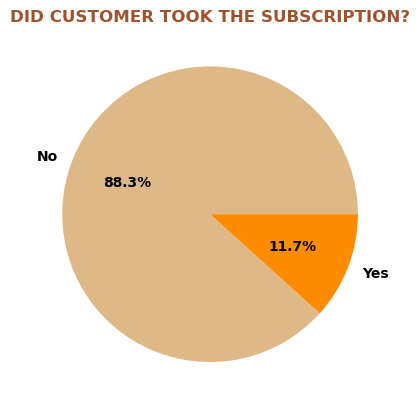

In [37]:
plt.pie(df['y'].value_counts(), colors = ['burlywood', 'darkorange'], labels = ['No', 'Yes'],
       autopct = '%1.1f%%', textprops = {'weight':'heavy'})

plt.title('DID CUSTOMER TOOK THE SUBSCRIPTION?', color = 'sienna', weight = 'bold')

plt.show()

## 9. Few more analysis over the data, for better understanding.

In [104]:
df[['job', 'education']].groupby(['job']).value_counts()

job            education
admin.         secondary    4219
               tertiary      572
               primary       209
               unknown       171
blue-collar    secondary    5371
               primary      3758
               unknown       454
               tertiary      149
entrepreneur   tertiary      686
               secondary     542
               primary       183
               unknown        76
housemaid      primary       627
               secondary     395
               tertiary      173
               unknown        45
management     tertiary     7801
               secondary    1121
               primary       294
               unknown       242
retired        secondary     984
               primary       795
               tertiary      366
               unknown       119
self-employed  tertiary      833
               secondary     577
               primary       130
               unknown        39
services       secondary    3457
               pri

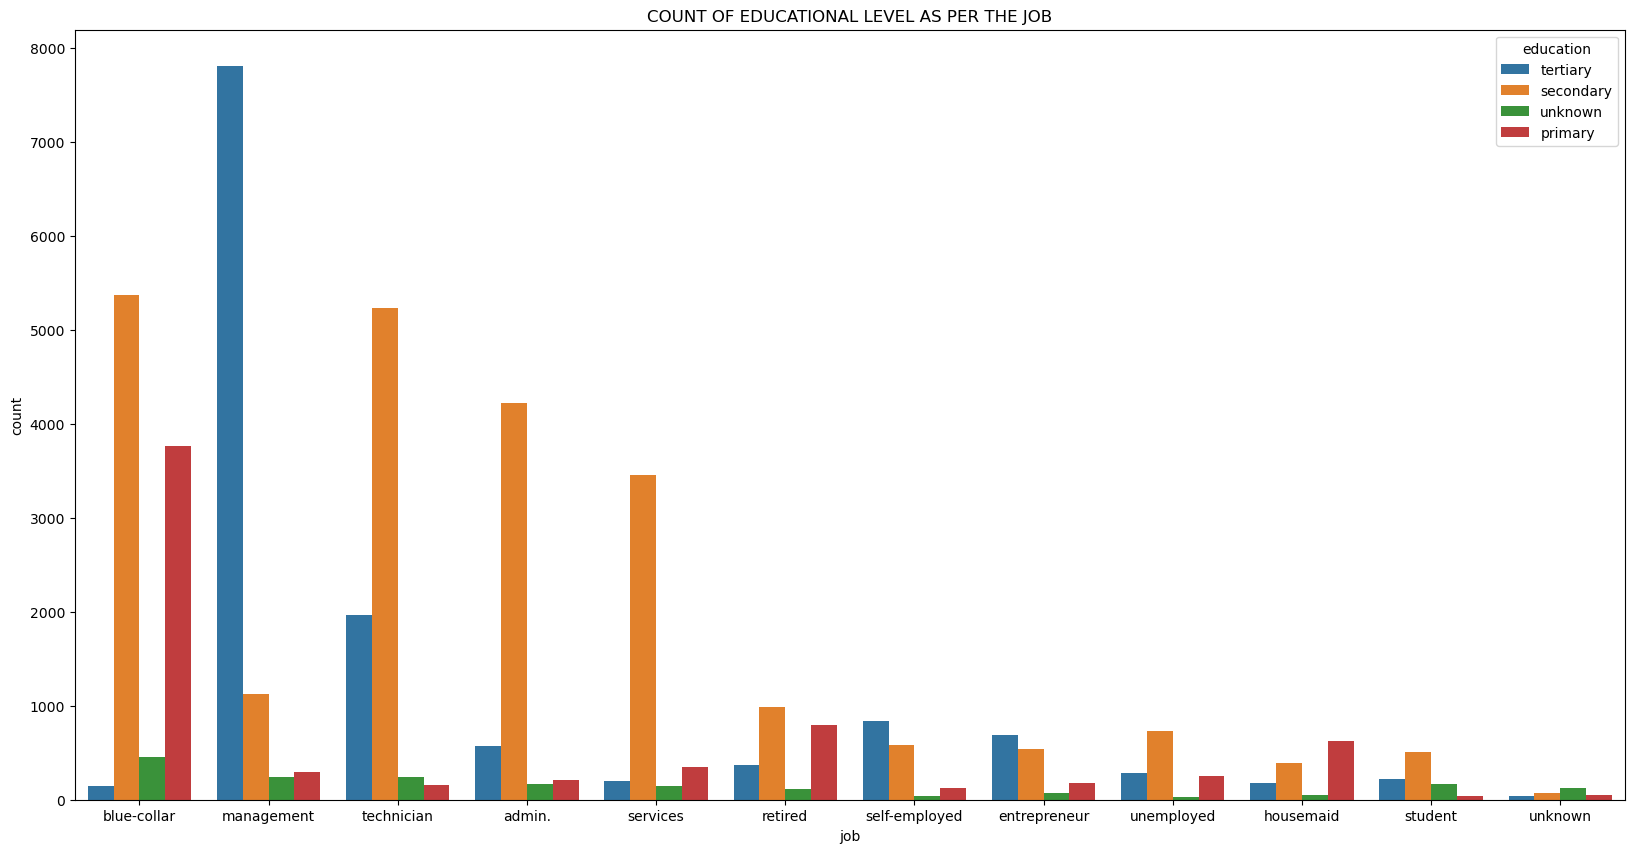

In [225]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x = 'job', hue = 'education', data = df, order = df['job'].value_counts().index).set(title = 'COUNT OF EDUCATIONAL LEVEL AS PER THE JOB')

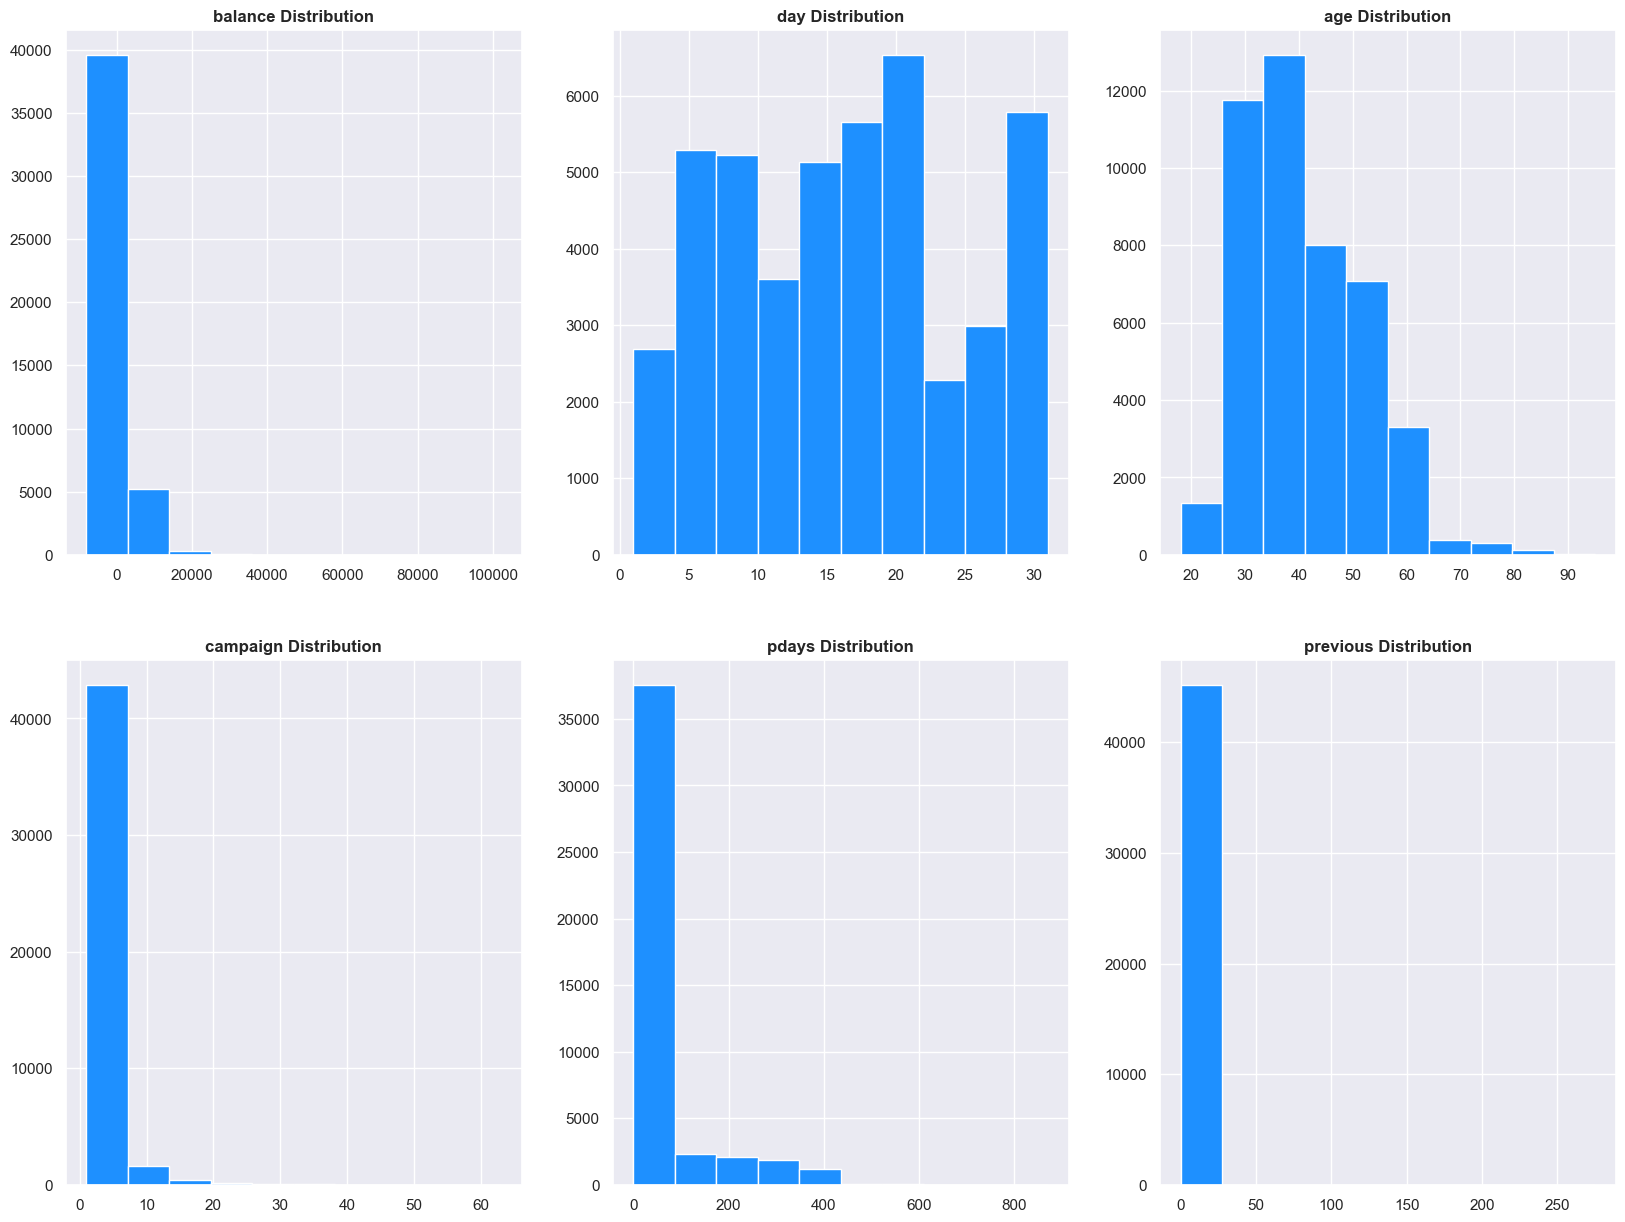

In [561]:
x = ['balance', 'day', 'age', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, figsize=(20, 15))

s = 0
for i in x:
    
    trace_x = s // 3
    trace_y = s % 3
    
    axs[trace_x, trace_y].hist(df[i], color = 'dodgerblue')
    
    axs[trace_x, trace_y].set_title(i + ' Distribution', weight = 'bold')
    
    s+=1
    
plt.show()

In [212]:
df.corr()

,Cust_num,age,balance,day,duration,campaign,pdays,previous
Cust_num,1.000000,0.014973,0.073639,-0.061465,0.013031,-0.102884,0.437277,0.271098
age,0.014973,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023841,0.001288
balance,0.073639,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003330,0.016674
day,-0.061465,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093024,-0.051710
duration,0.013031,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001584,0.001203
campaign,-0.102884,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088508,-0.032855
pdays,0.437277,-0.023841,0.003330,-0.093024,-0.001584,-0.088508,1.000000,0.454288
previous,0.271098,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454288,1.000000
